### Maldición de dimensionalidad

En términos de modelos de aprendizaje automático, a menudo tendemos a agregar varias características para captar características destacadas a pesar de que no nos proporcionarán una cantidad significativa de información nueva. Usando estas características redundantes, el rendimiento del modelo se deteriorará después de un tiempo. Este fenómeno a menudo se conoce como "la maldición de la dimensionalidad".

Cuando seguimos agregando entidades sin aumentar los datos utilizados para entrenar el modelo, las dimensiones del espacio de entidades se vuelven dispersas ya que la distancia promedio entre los puntos aumenta en el espacio dimensional alto. Debido a esta escasez, resulta mucho más fácil encontrar una solución conveniente y perfecta, pero no tan óptima, para el modelo de aprendizaje automático. En consecuencia, el modelo no se generaliza bien, lo que hace que las predicciones no sean confiables. También puede conocerlo como " sobre ajuste" . Es necesario reducir la cantidad de características considerablemente para aumentar el rendimiento del modelo y llegar a una solución óptima para el modelo


### Ejemplo

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [217]:
def getData(tamx,tamy):
    np.random.seed(4711)
    a = np.random.multivariate_normal([9,15],[[3,1],[1,4]], size=[tamx,])
    b = np.random.multivariate_normal([0,12],[[3,1],[1,4]], size=[tamy,])
    X = np.concatenate((a,b))

    labela = np.zeros(len(a))
    labelb = np.ones(len(b))

    y = np.append(labela,labelb,axis=0)

    plt.scatter(X[:,0], X[:,1],c=y,cmap="prism")
    plt.title("tamaño x: "+str(tamx)+" tamaño y: "+str(tamy))
    plt.show()
    
    return X,y

### Experimentando

La maldición de dimensionalidad se puede resolver a medida que el tamaño de los datos aumenta, por lo que se ve mas reflejada en problemas con pocos datos.

Experimentaremos formando datasets con datos pequeños y grandes para evaluar el comportamiento con el algoritmo de KNN.

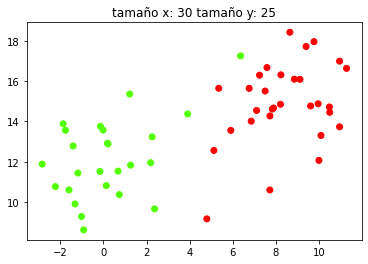

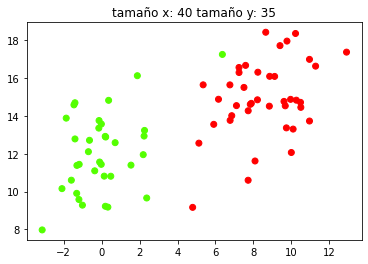

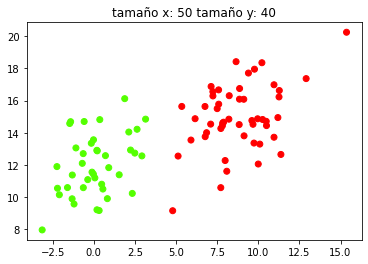

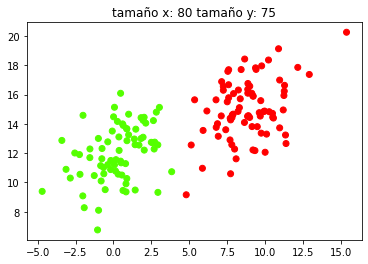

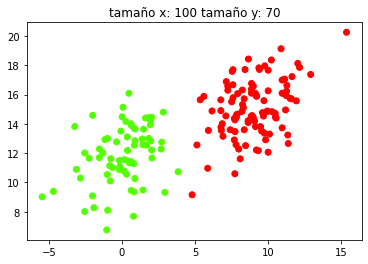

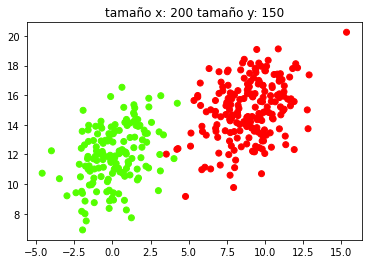

In [218]:
#obtenemos datasets de la forma X,y
parametros_d = [(30,25),(40,35),(50,40),(80,75),(100,70),(200,150)]
datasets = []
for p in parametros_d:
    datasets.append(getData(p[0],p[1]))

In [235]:
def printDatasets(datasets):
    
    degrees = [1,5,10,20,30]
    dataframes = []
    for da in datasets:
        X_train, X_test, y_train, y_test = train_test_split(da[0], da[1], test_size=0.3,random_state=60)
        trains = []
        tests = []
        
        for d in degrees:
            poly = PolynomialFeatures(d)
            x_poly_train = poly.fit_transform(X_train)
            x_poly_test = poly.fit_transform(X_test)

            knn = KNeighborsClassifier(n_neighbors=3)

            knn.fit(x_poly_train, y_train)

            y_pred_train = knn.predict(x_poly_train)
            y_pred_test = knn.predict(x_poly_test)

            trains.append(metrics.accuracy_score(y_pred_train,y_train))
            tests.append(metrics.accuracy_score(y_pred_test,y_test))
            
        data_m = pd.DataFrame(list(zip(degrees,trains,tests)),columns=['grado','train','test'])
        dataframes.append({"muestra":len(da[0]),"metrics":data_m})
    return dataframes

In [236]:
data = printDatasets(datasets)

In [239]:
for d in data:
    print('\nTamaño de la muestra: ',d['muestra'],'\n')
    print(d['metrics'])


Tamaño de la muestra:  55 

   grado     train      test
0      1  0.973684  0.941176
1      5  0.921053  0.823529
2     10  0.921053  0.764706
3     20  0.921053  0.705882
4     30  0.921053  0.705882

Tamaño de la muestra:  75 

   grado     train      test
0      1  0.980769  1.000000
1      5  0.961538  0.913043
2     10  0.942308  0.869565
3     20  0.923077  0.913043
4     30  0.923077  0.869565

Tamaño de la muestra:  90 

   grado     train      test
0      1  1.000000  1.000000
1      5  0.968254  0.962963
2     10  0.952381  0.925926
3     20  0.920635  0.925926
4     30  0.920635  0.925926

Tamaño de la muestra:  155 

   grado     train      test
0      1  1.000000  1.000000
1      5  0.990741  0.978723
2     10  0.990741  0.978723
3     20  0.962963  0.957447
4     30  0.953704  0.914894

Tamaño de la muestra:  170 

   grado     train      test
0      1  1.000000  1.000000
1      5  0.983193  0.980392
2     10  0.983193  0.980392
3     20  0.974790  0.960784
4     30  0.

### conclusiones

Se observa que en datasets con pocos datos aumentar la dimensionalidad el algoritmo tiende a bajar la exactitud en los datos de train aunque en menos medida se ve mas reflejado en los datos de prueba. Al aumentar el numero de datos en el dataset se ve que la presición mejora. Aunque siempre empeoara la presición. el algoritmo KNN funciona mejor con pocas caracteristicas, ya que al aumentar las dimensiones se requieren mas datos. A eso llamamos **maldición de dimensionalidad**